# How to evaluate embeddings using linear algebra and analogies 

The dimensions of the word and phrase vectors do not have an explicit meaning. However, the embeddings encode similar usage as proximity in the latent space in a way that carries over to semantic relationships. This results in the interesting properties that analogies can be expressed by adding and subtracting word vectors.

Just as words can be used in different contexts, they can be related to other words in different ways, and these relationships correspond to different directions in the latent space. Accordingly, there are several types of analogies that the embeddings should reflect if the training data permits.

The word2vec authors provide a list of several thousand relationships spanning aspects of geography, grammar and syntax, and family relationships to evaluate the quality of embedding vectors (see directory [analogies](data/analogies)).

## Imports

In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Settings

In [2]:
sns.set_style('white')
pd.set_option('float_format', '{:,.2f}'.format)
np.random.seed(42)

In [3]:
analogy_path = Path('data', 'analogies-en.txt')

In [4]:
def format_time(t):
    m, s = divmod(t, 60)
    h, m = divmod(m, 60)
    return f'{h:02.0f}:{m:02.0f}:{s:02.0f}'

## Evaluation: Analogies

In [5]:
df = pd.read_csv(analogy_path, header=None, names=['category'], squeeze=True)
categories = df[df.str.startswith(':')]
analogies = df[~df.str.startswith(':')].str.split(expand=True)
analogies.columns = list('abcd')

In [6]:
df = pd.concat([categories, analogies], axis=1)
df.category = df.category.ffill()
df = df[df['a'].notnull()]
df.head()

,category,a,b,c,d
1,: capital-common-countries,athens,greece,baghdad,iraq
2,: capital-common-countries,athens,greece,bangkok,thailand
3,: capital-common-countries,athens,greece,beijing,china
4,: capital-common-countries,athens,greece,berlin,germany
5,: capital-common-countries,athens,greece,bern,switzerland


In [7]:
analogy_cnt = df.groupby('category').size().sort_values(ascending=False).to_frame('n')
analogy_example = df.groupby('category').first()

In [8]:
analogy_cnt.join(analogy_example)

,n,a,b,c,d
category,,,,,
: capital-world,8556,abuja,nigeria,accra,ghana
: city-in-state,4242,chicago,illinois,houston,texas
: gram6-nationality-adjective,1640,albania,albanian,argentina,argentinean
: gram7-past-tense,1560,dancing,danced,decreasing,decreased
: gram8-plural,1332,banana,bananas,bird,birds
: gram3-comparative,1332,bad,worse,big,bigger
: gram4-superlative,1122,bad,worst,big,biggest
: gram5-present-participle,1056,code,coding,dance,dancing
: gram1-adjective-to-adverb,992,amazing,amazingly,apparent,apparently


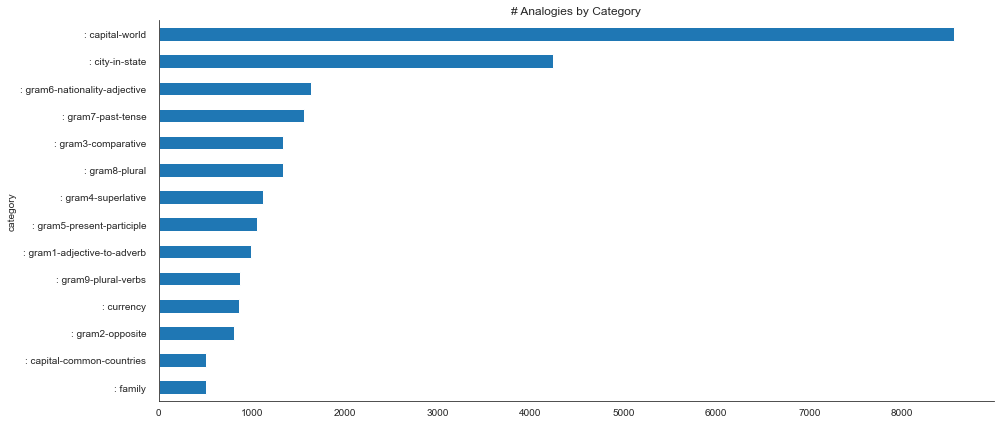

In [11]:
analogy_cnt.join(analogy_example)['n'].sort_values().plot.barh(title='# Analogies by Category',
                                                               figsize=(14, 6))
sns.despine()
plt.tight_layout()